# Preliminaries

This notebook requires `igraph` and `matplotlib` to be installed.

Documentation and installation instructions for igraph's Python interface are available at https://python.igraph.org/. Make sure you install the latest version.

If you run into problems, ask on our Piazza forum.

Evaluate the following to make sure you have the latest version of igraph successfully installed, and that you can use it from this notebook.

In [1]:
import igraph
igraph.__version__

'0.11.3'

# Setup

We will mostly use the `Graph` class from igraph, which can represent all sorts of graphs (undirected/directed, simple graph / multigraph). Let us import it for more convenient use.

In [2]:
from igraph import Graph

Evaluate the following cell to have graphs displayed automatically in notebooks. You will need to have `igraph_utils.py` in your working directory.

In [3]:
# This is a helper function for more convenient display of graph
from igraph_utils import format_igraph

get_ipython().display_formatter.ipython_display_formatter.for_type(igraph.Graph, format_igraph);

## Creating graphs and computing basic properties

In python-igraph, vertices are indexed from `0` to `n-1` where $n$ is the vertex count. A simple way to create a new graph is to specify its edges:

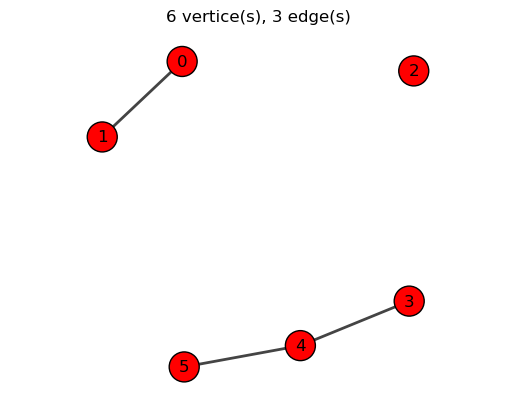

In [4]:
Graph([(0,1), (3,4), (4,5)])

Note that the existence of vertex `2` was implied by using indices larger than 2. We can also specify the vertex count manually:

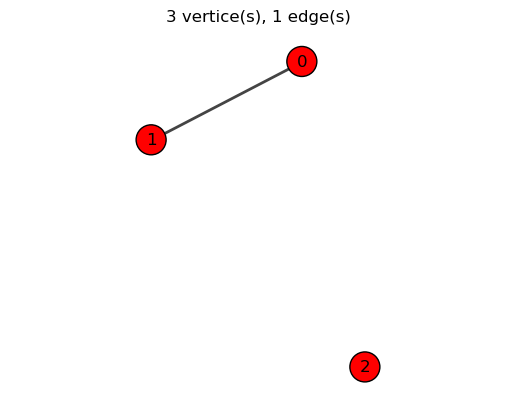

In [5]:
Graph([(0,1)], n=3)

To display graphs, simply evaluate the variable they are assigned to. For example:

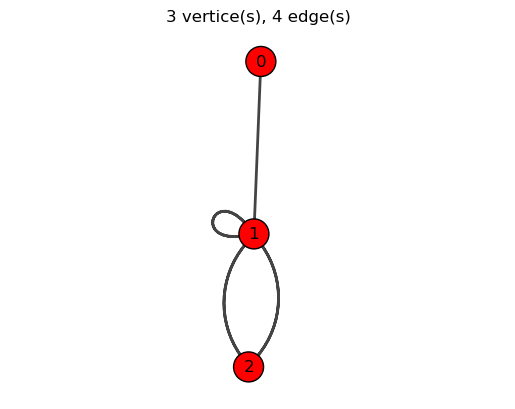

In [6]:
g = Graph([(0,1), (1,2), (1,2), (1,1)], n=3) # assign the graph to g
g # this is necessary for display

In [7]:
g.degree()

[1, 5, 2]

# Optional: Visualization

This section gives more details on graph visualization. Feel free to skip this section for now, and come back to it later.

We can also plot manually, using igraph's `plot` function. There are several plotting backends. By default, igraph uses the Cairo backend, which requires the `pycairo` package. In the example below we choose the Matplotlib beckend instead:

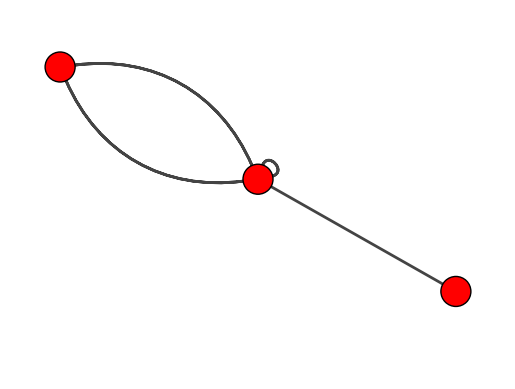

In [8]:
igraph.plot(g, backend='matplotlib')

The `plot` function has many options to control the appearance of the plot. You can read about these in the tutorial: https://python.igraph.org/en/stable/tutorial.html

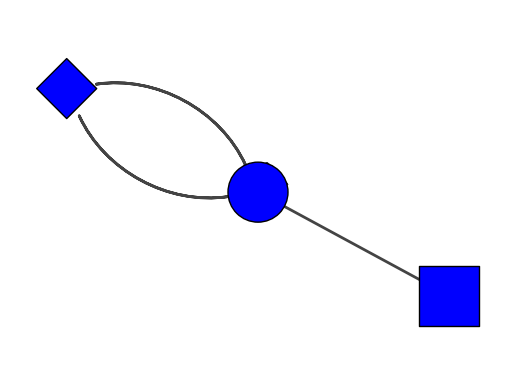

In [9]:
igraph.plot(g, backend='matplotlib', vertex_size=60, vertex_color='blue', vertex_shape=['rectangle', 'circle', 'diamond'])

Here we will mostly use automatic display, and the `format_igraph()` helper function, which auto-display is based on.

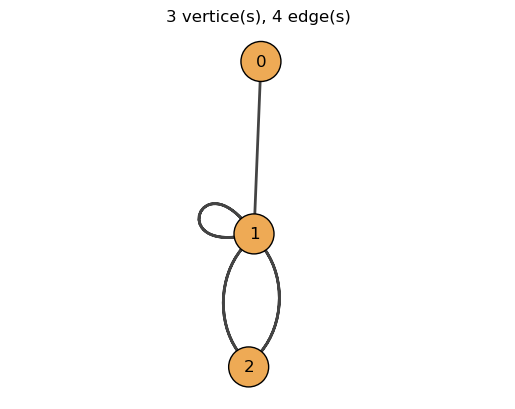

In [10]:
format_igraph(g, vertex_size=40, vertex_color='#eeaa55')

Certain vertex attributes, accessible through `g.vs`, are used automatically when plotting.

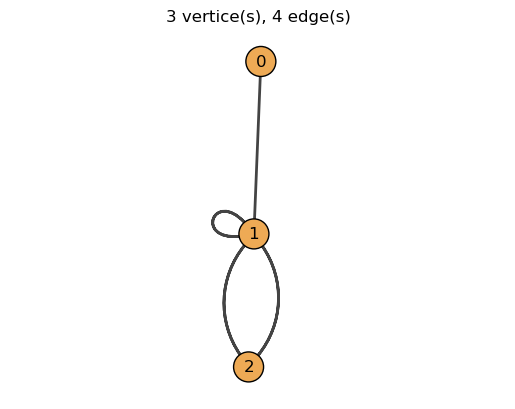

In [11]:
g.vs['color'] = '#ea5'
g

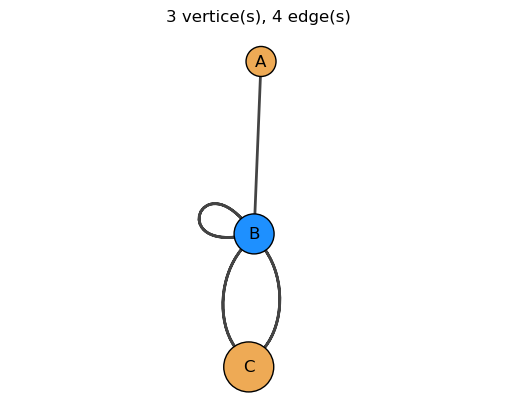

In [12]:
g.vs['size'] = [30, 40, 50]
g.vs['label'] = ['A', 'B', 'C']
g.vs[1]['color'] = 'DodgerBlue'
g

Inspect the attributes:

In [13]:
g.vertex_attributes()

['color', 'size', 'label']

In [14]:
g.vs['color']

['#ea5', 'DodgerBlue', '#ea5']

# Graph constructors and graph properties

Let's get back to methods of creating graphs. A very convenient way is to use the "formula notation":

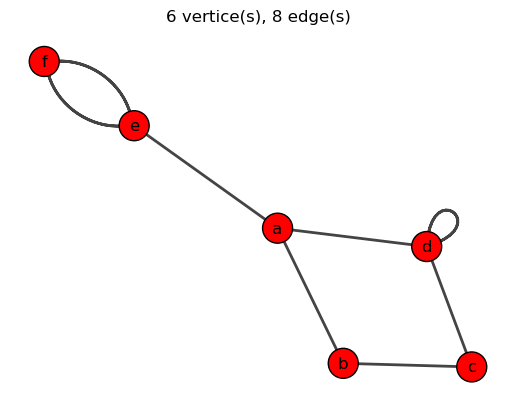

In [15]:
g = Graph.Formula('a-b-c-d-a-e-f-e, d-d', simplify=False)
g

Now vertices have names which are strings. These were displayed in the plot above.

Names are stores as a "vertex attribute" called `name`. We can get all of them in a list like so:

In [16]:
g.vs['name']

['a', 'b', 'c', 'd', 'e', 'f']

We can now refer to vertices by name when manipulating the graph. For example, let us delete vertex `a`:

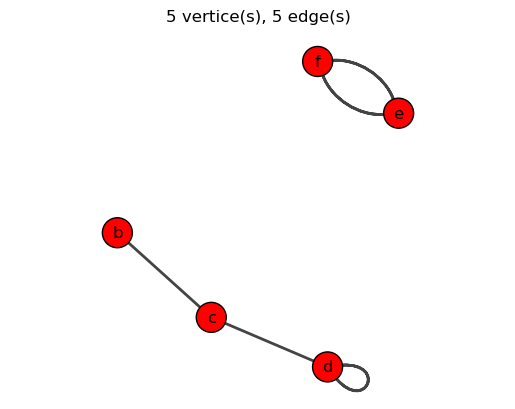

In [17]:
g.delete_vertices(['a'])
g

igraph has many functions to create graphs. A few are demonstrated below.

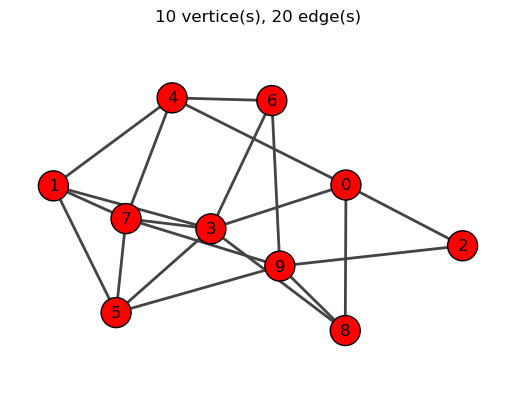

In [18]:
# Random graph with n vertices and m edges
Graph.Erdos_Renyi(n=10,m=20)

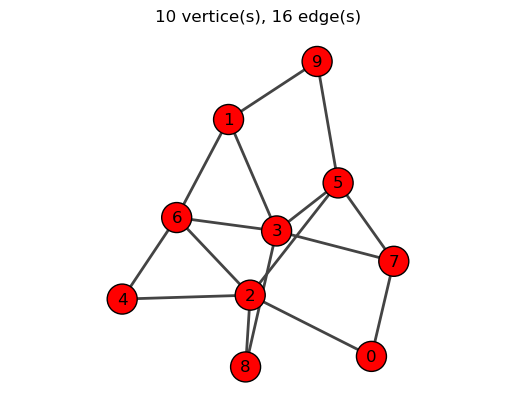

In [19]:
# Random graph with n vertices, and each vertex pair being connected with probability p
g = Graph.Erdos_Renyi(n=10, p=0.15)
g

In [20]:
g.is_connected()

True

In [21]:
list(g.connected_components())

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [22]:
g.girth()

3

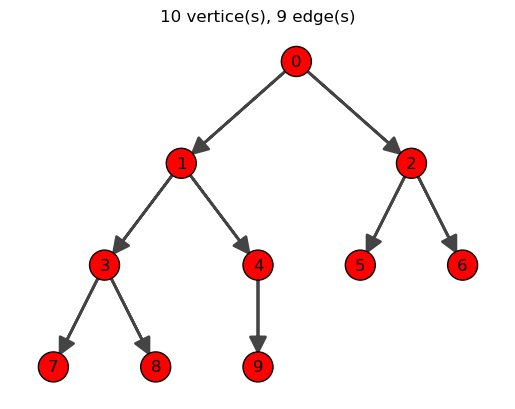

In [23]:
Graph.Tree(10, 2, mode = 'out')

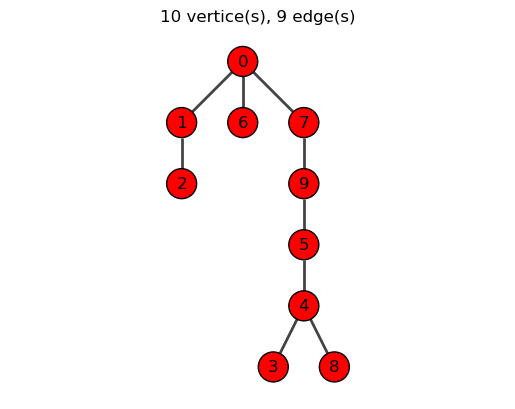

In [24]:
g = Graph.Tree_Game(10)
g

In [25]:
g.is_tree()

True

In [26]:
g.diameter()

7

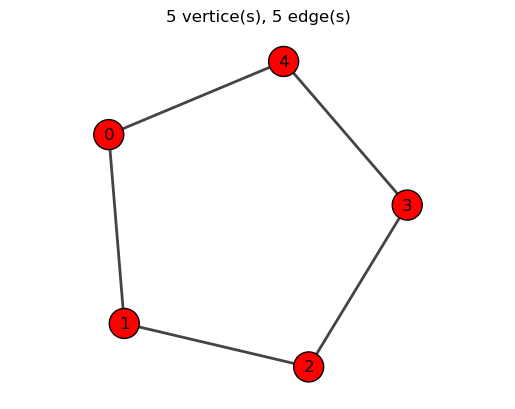

In [27]:
# C_5
Graph.Ring(5)

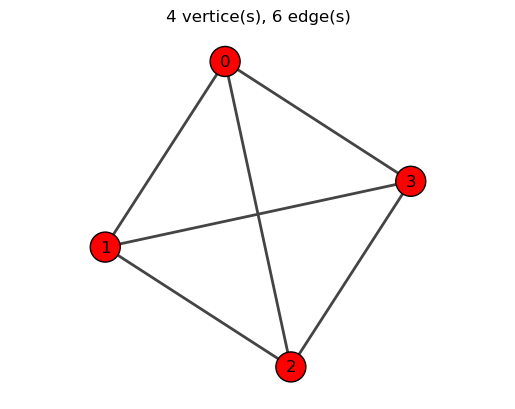

In [28]:
# K_4
Graph.Full(4)

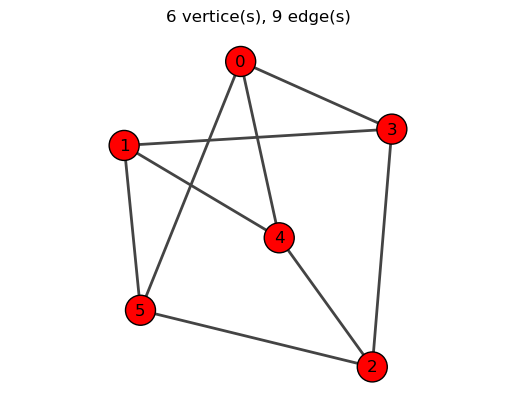

In [29]:
# K_{3,3}
g = Graph.Full_Bipartite(3,3)
g

In [30]:
g.is_bipartite()

True

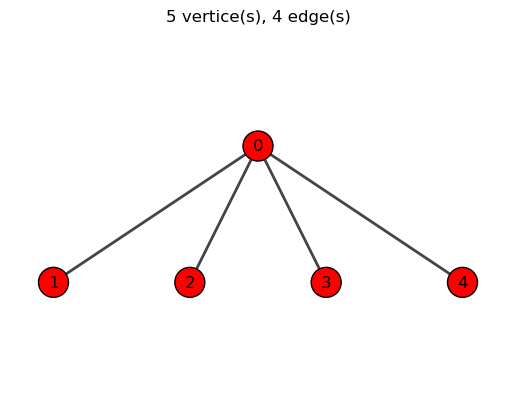

In [31]:
# S_5 = K_{1,4}
Graph.Star(5)

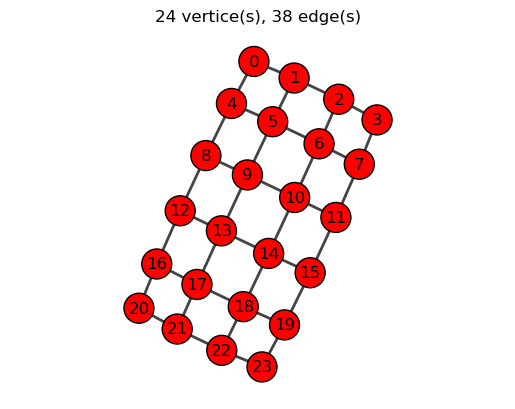

In [32]:
Graph.Lattice([4,6], circular=False)

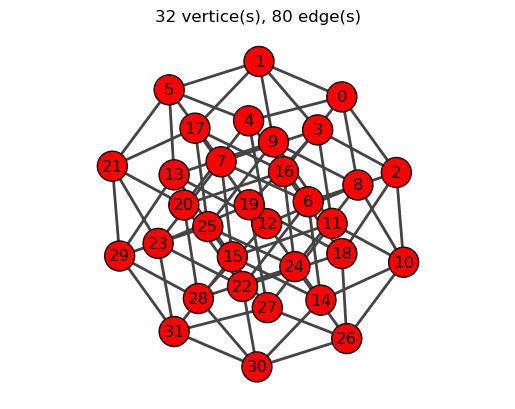

In [33]:
# 5-hypercube
g=Graph.Lattice([2,2,2,2,2], circular=False)
g

In [34]:
g.is_bipartite()

True